In [1]:
%load_ext memory_profiler

In [2]:
base_grid_kwargs = {
    "size_x": 1080, 
    "size_y": 1080, 
    "center_lon": -20, 
    "center_lat": 65, 
    "rot": 0, 
    "topography_source": {
        "name": "SRTM15",
        "path": "/glade/derecho/scratch/noraloose/Datasets/SRTM15/SRTM15_V2.6.nc",
    }
}

In [3]:
grids = {
    "A": {"nx": 1000, "ny": 1000, "N": 100, **base_grid_kwargs},
    "B": {"nx": 2000, "ny": 2000, "N": 100, **base_grid_kwargs},  
    "C": {"nx": 2000, "ny": 2000, "N": 500, **base_grid_kwargs},   
}

# Performance

In [4]:
key = "A"

In [5]:
use_dask = True
bypass_validation = False

In [6]:
from roms_tools import Grid

We first create our grid object.

In [7]:
grid = Grid(**grids[key])

In [8]:
from datetime import datetime

In [9]:
start_time = datetime(2012, 1, 1)
end_time = datetime(2012, 12, 31)

In [10]:
glorys_path = "/glade/derecho/scratch/noraloose/Datasets/GLORYS/NA/2012/*.nc"

In [11]:
from roms_tools import BoundaryForcing

In [12]:
%%time
%%memit

boundary_forcing = BoundaryForcing(
    grid=grid,
    start_time=start_time,
    end_time=end_time,
    boundaries={
        "south": True,
        "east": True,
        "north": True,
        "west": True,
    },
    source={"name": "GLORYS", "path": glorys_path},
    type="physics",  # "physics" or "bgc"; default is "physics"
    use_dask=True,  # default is False
    apply_2d_horizontal_fill=True
)

WARNING - No records found at or before the start_time.


peak memory: 1902.65 MiB, increment: 1382.22 MiB
CPU times: user 22.5 s, sys: 5.12 s, total: 27.7 s
Wall time: 25.4 s


In [13]:
boundary_forcing.ds

<xarray.Dataset> Size: 2GB
Dimensions:     (bry_time: 366, s_rho: 100, xi_u: 1001, xi_rho: 1002,
                 eta_rho: 1002, eta_v: 1001)
Coordinates:
    abs_time    (bry_time) datetime64[ns] 3kB 2012-01-01T12:00:00 ... 2012-12...
  * bry_time    (bry_time) float64 3kB 4.384e+03 4.384e+03 ... 4.748e+03
Dimensions without coordinates: s_rho, xi_u, xi_rho, eta_rho, eta_v
Data variables: (12/28)
    u_south     (bry_time, s_rho, xi_u) float32 147MB dask.array<chunksize=(1, 100, 1001), meta=np.ndarray>
    v_south     (bry_time, s_rho, xi_rho) float32 147MB dask.array<chunksize=(1, 100, 1002), meta=np.ndarray>
    zeta_south  (bry_time, xi_rho) float32 1MB dask.array<chunksize=(1, 1002), meta=np.ndarray>
    temp_south  (bry_time, s_rho, xi_rho) float32 147MB dask.array<chunksize=(1, 100, 1002), meta=np.ndarray>
    salt_south  (bry_time, s_rho, xi_rho) float32 147MB dask.array<chunksize=(1, 100, 1002), meta=np.ndarray>
    ubar_south  (bry_time, xi_u) float32 1MB dask.array<chunksize=(1, 1001), meta=np.ndarray>
    ...          ...
    v_west      (bry_time, s_rho, eta_v) float32 147MB dask.array<chunksize=(1, 100, 1001), meta=np.ndarray>
    zeta_west   (bry_time, eta_rho) float32 1MB dask.array<chunksize=(1, 1002), meta=np.ndarray>
    temp_west   (bry_time, s_rho, eta_rho) float32 147MB dask.array<chunksize=(1, 100, 1002), meta=np.ndarray>
    salt_west   (bry_time, s_rho, eta_rho) float32 147MB dask.array<chunksize=(1, 100, 1002), meta=np.ndarray>
    ubar_west   (bry_time, eta_rho) float32 1MB dask.array<chunksize=(1, 1002), meta=np.ndarray>
    vbar_west   (bry_time, eta_v) float32 1MB dask.array<chunksize=(1, 1001), meta=np.ndarray>
Attributes:
    title:                 ROMS boundary forcing file created by ROMS-Tools
    roms_tools_version:    0.1.dev165
    start_time:            2012-01-01 00:00:00
    end_time:              2012-12-31 00:00:00
    source:                GLORYS
    model_reference_date:  2000-01-01 00:00:00
    theta_s:               5.0
    theta_b:               2.0
    hc:                    300.0

In [14]:
print(f"Memory footprint: {boundary_forcing.ds.nbytes / 1e6:.2f} MB")

Memory footprint: 2364.10 MB


[########################################] | 100% Completed | 1.22 sms
peak memory: 1949.45 MiB, increment: 544.83 MiB
CPU times: user 1.67 s, sys: 753 ms, total: 2.42 s
Wall time: 1.87 s


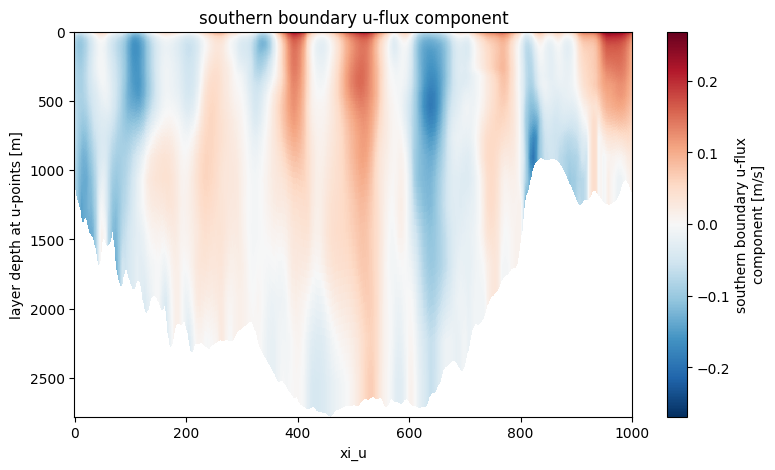

In [15]:
%%time
%%memit

boundary_forcing.plot("u_south")

In [16]:
filepath = "/glade/derecho/scratch/noraloose/forcing/my_boundary_forcing.nc"

In [17]:
%%time
%%memit

boundary_forcing.save(filepath, group=True)

[########################################] | 100% Completed | 55.38 s
[########################################] | 100% Completed | 50.93 s
[########################################] | 100% Completed | 53.41 s
[########################################] | 100% Completed | 52.43 s
[########################################] | 100% Completed | 55.02 s
[########################################] | 100% Completed | 52.72 s
[########################################] | 100% Completed | 55.03 s
[########################################] | 100% Completed | 54.56 s
[########################################] | 100% Completed | 52.35 s
[########################################] | 100% Completed | 53.78 s
[########################################] | 100% Completed | 70.17 s
[########################################] | 100% Completed | 72.27 s
peak memory: 4857.23 MiB, increment: 3574.56 MiB
CPU times: user 24min 11s, sys: 6min 36s, total: 30min 48s
Wall time: 11min 36s
